### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
### Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
### Q3. Check for null values, identify categorical variables, and encode them.
### Q4. Separate the features and target variables from the dataframe.
### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.
### Q6. Perform scaling on the dataset.
### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
### Q8. Create a Sequential model and add all the layers to it.
### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
### Q12. Print the model summary.
### Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
### Q14. Compile the model with the specified loss function, optimizer, and metrics.
### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
### Q16. Get the model's parameters.
### Q17. Store the model's training history as a Pandas DataFrame.
### Q18. Plot the model's training history.
### Q19. Evaluate the model's performance using the test data.

In [6]:
# Step 1: Install and load the latest versions of TensorFlow and Keras

# !pip install tensorflow
# !pip install keras

import tensorflow as tf
import keras
# from tensorflow import keras


# Print their versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [7]:
# Step 2: Load the Wine Quality dataset and explore its dimensions
import pandas as pd

wine_data = pd.read_csv("wine.csv")

# Explore the dimensions of the dataset
print("Dataset dimensions:", wine_data.shape)

Dataset dimensions: (1599, 12)


In [8]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [14]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
# Step 3: Check for null values, identify categorical variables, and encode them
# Check for null values
print("Null values in the dataset:\n", wine_data.isnull().sum())

# Identify categorical variables
# categorical_vars = ['quality']

# Encode categorical variables using one-hot encoding
# wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_vars)

# quality: bad=0 and good=1
wine_data['quality'] = wine_data['quality'].replace({'bad': 0, 'good': 1})

Null values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [17]:
wine_data_encoded.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_bad', 'quality_good'],
      dtype='object')

In [19]:
# Step 4: Separate the features and target variables from the dataframe
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

In [20]:
# Step 5: Perform a train-test split and divide the data into training, validation, and test datasets
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
# Step 6: Perform scaling on the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Step 7 and Step 8: Create at least 2 hidden layers and an output layer for the binary categorical variables and Create a Sequential model and add all the layers to it
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add hidden layers (adjust the number of units as needed)
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))

# Add the output layer for binary classification (assuming the output is 1 or 0)
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
# Step 9: Implement a TensorBoard callback to visualize and monitor the model's training process
from keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
# Step 10: Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
# Step 11: Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')

In [26]:
# Step 12: Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Step 13 and Step 14: Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'] and Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Step 15: Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

Epoch 1/50
40/40 [==============================] - 1s 23ms/step - loss: 0.4493 - accuracy: 0.7920 - val_loss: 0.5321 - val_accuracy: 0.7188
Epoch 2/50
40/40 [==============================] - 1s 18ms/step - loss: 0.4469 - accuracy: 0.7912 - val_loss: 0.5329 - val_accuracy: 0.7125
Epoch 3/50
40/40 [==============================] - 1s 16ms/step - loss: 0.4418 - accuracy: 0.7944 - val_loss: 0.5247 - val_accuracy: 0.7375
Epoch 4/50
40/40 [==============================] - 1s 17ms/step - loss: 0.4401 - accuracy: 0.8014 - val_loss: 0.5277 - val_accuracy: 0.7312
Epoch 5/50
40/40 [==============================] - 1s 21ms/step - loss: 0.4362 - accuracy: 0.7998 - val_loss: 0.5254 - val_accuracy: 0.7312
Epoch 6/50
40/40 [==============================] - 1s 21ms/step - loss: 0.4352 - accuracy: 0.7975 - val_loss: 0.5226 - val_accuracy: 0.7375
Epoch 7/50
40/40 [==============================] - 1s 18ms/step - loss: 0.4319 - accuracy: 0.8014 - val_loss: 0.5246 - val_accuracy: 0.7250
Epoch 8/50
40

In [31]:
# Step 16: Get the model's parameters
model.get_weights()

[array([[-1.61331788e-01, -3.27475108e-02,  2.50814646e-01,
          6.39955178e-02,  2.47481048e-01,  5.16680107e-02,
          7.63092563e-02,  1.42316326e-01, -5.48430113e-03,
          1.86128467e-01,  1.94570839e-01, -2.06950039e-01,
         -1.47154868e-01,  2.09397241e-01,  1.86234191e-01,
          4.62649763e-02,  6.56928420e-02, -2.29586840e-01,
          1.19876467e-01,  2.73704886e-01,  2.70801961e-01,
          1.38910813e-03, -6.10504597e-02, -1.25236452e-01,
         -7.60863945e-02,  7.32727200e-02, -9.14985836e-02,
         -1.55177578e-01, -6.93178028e-02,  1.96211338e-01,
         -2.95166373e-01, -1.93113968e-01, -2.32893392e-01,
         -1.67196065e-01, -1.77897647e-01,  5.76326996e-02,
         -1.88997760e-01, -7.71508217e-02, -1.32400081e-01,
         -1.65835679e-01, -1.66248232e-01, -2.47017771e-01,
         -1.09280653e-01, -2.83941418e-01, -2.58437395e-01,
         -3.47586833e-02, -2.24388808e-01,  2.39214718e-01,
          1.67618990e-01,  2.69089490e-0

In [32]:
# Step 17: Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

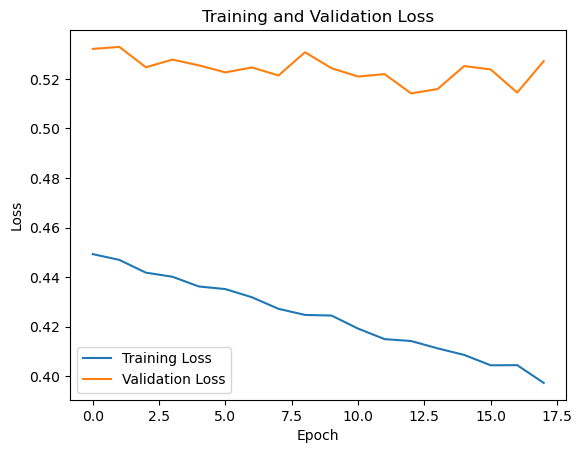

In [33]:
# Step 18: Plot the model's training history
import matplotlib.pyplot as plt

plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Step 19: Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 6ms/step - loss: 0.4634 - accuracy: 0.7563
Test Loss: 0.46339306235313416
Test Accuracy: 0.7562500238418579
